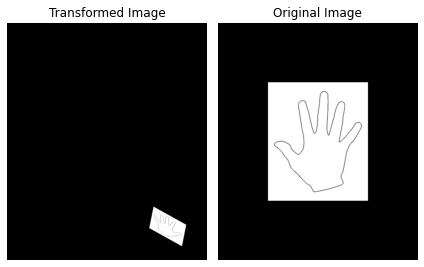

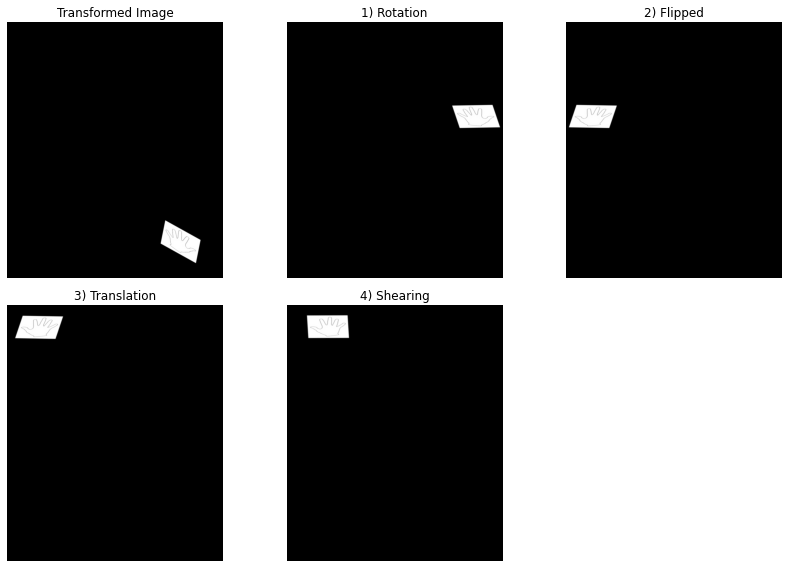

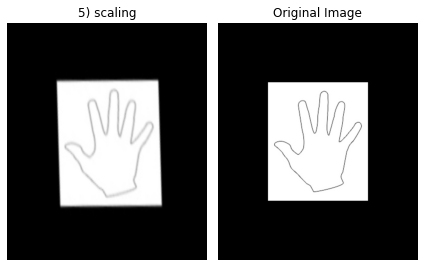

In [1]:
# Hand
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Showing Transformed Image
img = cv2.imread("./transformed_image.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Transformed Image')
plt.axis('off')
############################################################


# Showing Original Image
org_img = cv2.imread("./Original_image.jpg",cv2.IMREAD_COLOR)
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(org_img)
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()
############################################################


# Transformation 1 : Rotation
h, w = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((-200,h/2),30,1)
img_rotated = cv2.warpAffine(img,rotation_matrix,(w,h))
############################################################
# Transformation 2 : Flipping
img_flipped = cv2.flip(img_rotated,1)
############################################################
# Transformation 3 : Translation
Tx = 20
Ty = -275
T = np.float32([
    [1, 0, Tx],
    [0, 1, Ty]
])
img_translated = cv2.warpAffine(img_flipped,T,(w,h))
############################################################
# Transformation 4 : Shearing
shx = 0.4  # Shear factor in x-direction
shy = -0.02  # Shear factor in y-direction
# Horizontal shearing matrix
M = np.float32([
    [1, shx, 0],
    [shy, 1, 0]
])
# Apply horizontal shearing
img_sheared = cv2.warpAffine(img_translated, M, (w , h))
############################################################
# Transformation 5 : Scaling
fx = 2.7
fy = 6
new_width = int(fx * w)
new_height = int(fy * h)
img_scaled = cv2.resize(img_sheared, (new_width, new_height))
############################################################

# Showing 4 transformations and the Transformed Image
images = [img , img_rotated , img_flipped , img_translated , img_sheared]
titles = ['Transformed Image', '1) Rotation', '2) Flipped', '3) Translation', '4) Shearing']
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
##############################################################

# Final Scaling transformation and comparing it to the original image
plt.subplot(1, 2, 1)
plt.imshow(img_scaled)
plt.title('5) scaling')
plt.axis('off')
plt.xlim(0, w)
plt.ylim(h, 0)

plt.subplot(1, 2, 2)
plt.imshow(org_img)
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()
##############################################################


<div dir="rtl">
ابتدا تصویر تغییر یافته را بررسی کرده ایم و تغییرات لازمه اعم از چرخش، قرینه کردن، انتقال، شییرینگ و در نهایت تغییر اندازه را خواهیم داشت. در برنامه نوشته شده، در دو بخش اول تصویر تغییر یافته و تصویر اصلی را نمایش می دهیم.
    در ادامه 5 تبدیل بر روی تصویر تغییر یافته اعمال شده تا به تصویر اصلی برسیم.
    تبدیل اول چرخش هست بعد از آن تصویر را آیینه کرده ایم و در ادامه یک انتقال خواهیم داشت.
    برای تغییر چهارم با استفاده از شییرینگ آن را مسطح در صفحه x و y می کنیم
    در ادامه هم باید scale شود تا شبیه عکس اصلی شود.
    در آخر بعد از اسکیل کردن آن را با تصویر اصلی مقایسه کرده ایم.
</div>

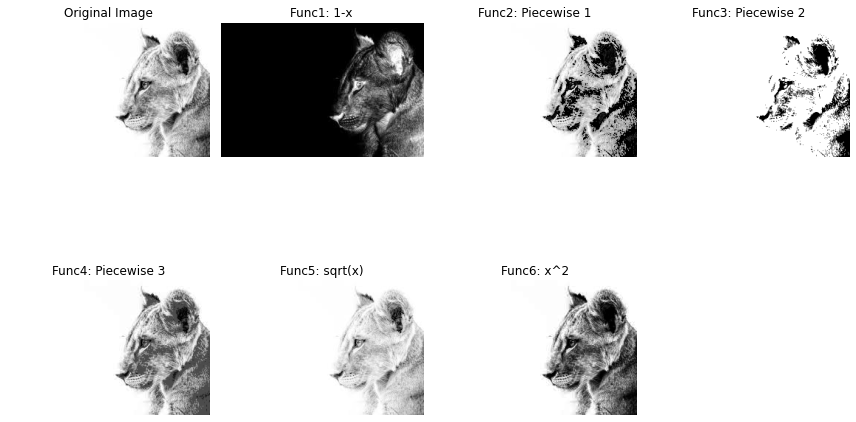

In [2]:
# Functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_function(img, func):
    # Normalize image to [0, 1]
    img_normalized = img / 255.0
    # Apply the function
    enhanced_img = func(img_normalized)
    # Convert back to [0, 255]
    enhanced_img = np.clip(enhanced_img * 255, 0, 255).astype(np.uint8)
    return enhanced_img

# Define the functions
# Function 1 : 1-X
def func1(x):
    return 1 - x
##################################
# Function 2
def func2(x):
    return np.where(
        x <= 0.2, x,
        np.where(x <= 0.55, 0, x)
    )
###################################
# Function 3
def func3(x):
    return np.where(
        x <= 0.4, 0,
        np.where(x <= 0.55, x, 1)
    )
###################################
# Function 4
def func4(x):
    return np.where(
        x <= 0.2, (3/2)* x,
        np.where(x <= 0.55, 0.3, x* (0.6/0.45) -(0.15/0.45))
    )
###################################
# Function 5
def func5(x):
    return np.sqrt(x)
###################################
# Function 6
def func6(x):
    return np.power(x, 2)
###################################


# Load the image
img = cv2.imread(r'./image1.jfif', cv2.IMREAD_GRAYSCALE)

# Apply each function to the image
enhanced_img1 = apply_function(img, func1)
enhanced_img2 = apply_function(img, func2)
enhanced_img3 = apply_function(img, func3)
enhanced_img4 = apply_function(img, func4)
enhanced_img5 = apply_function(img, func5)
enhanced_img6 = apply_function(img, func6)

# Display the results
titles = ['Original Image', 'Func1: 1-x', 'Func2: Piecewise 1', 'Func3: Piecewise 2', 
          'Func4: Piecewise 3', 'Func5: sqrt(x)', 'Func6: x^2']
images = [img, enhanced_img1, enhanced_img2, enhanced_img3, enhanced_img4, enhanced_img5, enhanced_img6]

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


<div dir="rtl">
در بخش دوم ابتدا عکس اصلی را نمایش داده ایم و سپس در هر کدام از عکس ها اثر اعمال تابع های تعریف شده در کد را می بینیم.
    در این برنامه تابعی تعریف شده با عنوان apply_function که وظیفه دارد تا تابع داده شده به آن را بر روی تصویر اعمال کند.
    ابتدا در این تابع تصویر نرمالایز می شود با تقسیم بر 255 و مقادیر پیکسل ها در بازه 0 و 1 نرمالیزه می شود تا بتوان راحت تر تغییرات را در تصویر سیاه و سفید مشاهده کرد.
    <p dir="rtl">
تابع اول با منفی کردن هر پیکسل انگاری سفیدی ها را سیاه و سیاهی ها را سفید می کند و در واقع invert می کند.
    </p>
        <p dir="rtl">
    تابع دوم با صفر کردن مقادیر بین 0.2 تا 0.55 باعث می شود تصویر شارپ تر به نظر برسد و عملا یک سری بخش های طوسی را سیاه کند.
    </p>
        <p dir="rtl">
    تابع سوم کنتراستش خیلی بیشتر است اما وقتی اعمال می کنیم نقاطی که مقدار آن کمتر از 0.4 هست را سیاه می کند و نقاط بالاتر از 0.55 را سفید می کند به همین خاطر است که تصویر به نظرمان روشن تر است.
    </p>
        <p dir="rtl">
    تابع چهارم کنتراست خوبی دارد و عملا یک تابع خطی کامل نیست و در مقادیر 0.2 تا 0.55 مقدار 0.3 را فرض می کند که یعنی نقاط 0.2 تا 0.3 را روشن تر می کند و پیکسل های روشن تر یعنی از 0.3 تا 0.55 را تاریک تر می کند.
    </p>
        <p dir="rtl">
    تابع پنجم یک تابع غیر خطی است که به نظر شارپ بودن تصویر را بیشتر کرده و عملا طیف رنگی بهتری نسبت به تابع خطی دارد.
    </p>
        <p dir="rtl">
    تایع ششم هم تابعی غیر خطی است اما تفاوت آن با تابع پنجم شیب و مقادیری است که طی می کند با توجه به شکل هر کدام می توان گفت که تابع پنجم تصویر را روشن تر می کند در عین حال که شارپ تر می کند.
    اما تابع ششم تصویر را با توجه به معادله ای که دارد تاریک تر می کند در عین حال که آن را شارپ تر می کند.
    </p> 
</div>

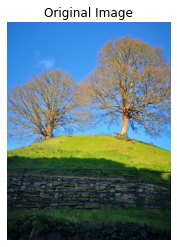

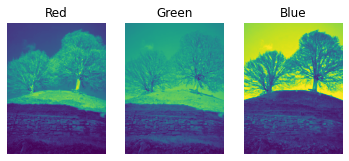

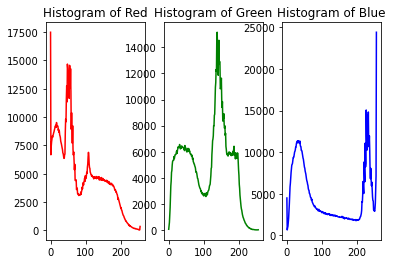

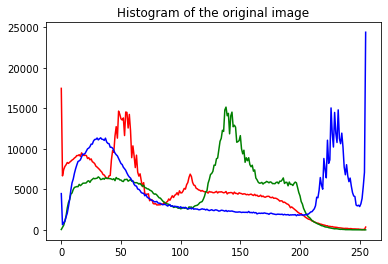

In [3]:
# Trees
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Showing Original Image
img2 = cv2.imread("./trees.jpeg",cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title('Original Image')
plt.axis('off')
plt.show()
###################################################

# Splitting
R, G, B = cv2.split(img2)

# Showing all Channels
# Red Channel
plt.subplot(1, 3, 1)
plt.title("Red")
plt.imshow(R)
plt.axis('off')
# Green Channel
plt.subplot(1, 3, 2)
plt.title("Green")
plt.imshow(G)
plt.axis('off')
# Blue Channel
plt.subplot(1, 3, 3)
plt.title("Blue")
plt.imshow(B)
plt.axis('off')

plt.show()
######################################################
#Calculating Histograms
# Red Histogram
hist_r = cv2.calcHist([R], [0], None, [256], [0, 256])
plt.subplot(1, 3, 1)
plt.plot(hist_r, color='r') 
plt.title('Histogram of Red')

# Green Histogram
hist_g = cv2.calcHist([G], [0], None, [256], [0, 256])
plt.subplot(1, 3, 2)
plt.plot(hist_g, color='g') 
plt.title('Histogram of Green') 

# Blue Histogram
hist_b = cv2.calcHist([B], [0], None, [256], [0, 256])
plt.subplot(1, 3, 3)
plt.plot(hist_b, color='b') 
plt.title('Histogram of Blue') 
plt.show()

# define colors to plot the histograms 
colors = ('r','g','b') 
  
# compute and plot the original image's histograms 
for i,color in enumerate(colors): 
    hist = cv2.calcHist([img2],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Histogram of the original image') 
plt.show()
#########################################################

<p dir="rtl">
     برای این بخش ابتدا تصویر اصلی را نمایش دادیم و بعد با دستور split همه بخش های R، G و B را جدا می کنیم و هیستوگرام آن را جدا جدا برای هر رنگ R، G و B با دستور calcHist محاسبه می کنیم و نمودارهای آن ها را کنار هم رسم می کنیم.
    در نهایت هم هیستوگرام هر سه را در یک نمودار رسم می کنیم و نمایش می دهیم.
    </p>

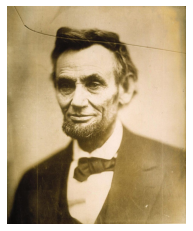

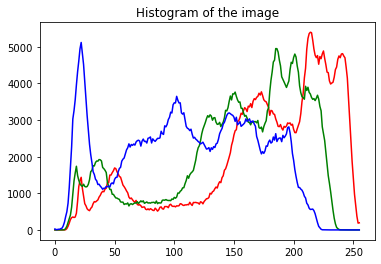

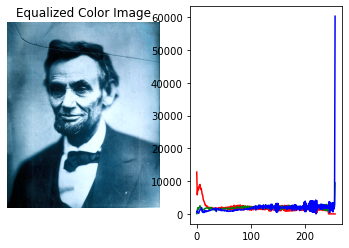

In [4]:
# Abraham
# Showing Abraham
img3 = cv2.imread("./abraham.jpg",cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.axis('off')
plt.show()
####################################################

# compute and plot the image histograms 
for i,color in enumerate(colors): 
    hist = cv2.calcHist([img3],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Histogram of the image') 
plt.show()
#####################################################
# Convert the image from BGR to YUV color space
yuv_image = cv2.cvtColor(img3, cv2.COLOR_BGR2YUV)

# Apply histogram equalization to the Y channel (luminance)
yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

# Convert the image back to BGR color space
equalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)
equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.title('Equalized Color Image')
plt.axis('off')
plt.imshow(equalized_image)

# compute and plot the image histograms 
plt.subplot(1, 2, 2)
for i,color in enumerate(colors): 
    hist = cv2.calcHist([equalized_image],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.show()
######################################################

<div dir="rtl">
    <p dir="rtl">
        ابتدا عکس اصلی abraham را نشان داده ایم.
    </p>
    <p dir="rtl">
        بعد هیستوگرام عکس اصلی abraham را نشان دادیم.
    </p>
    <p dir="rtl">
        بعد Histogram Equalization را بر عکس آبراهام اعمال کردیم.
    </p>
    <p dir="rtl">
    در نهایت هیستوگرام عکس جدید آبراهام که بر روی آن Histogram Equalization انجام شده بود، را نشان دادیم.
    </p>
    <p dir="rtl">
    می بینیم که تصویر آبراهام هم واضح تر شد و هم شارپ تر.
        در عین حال طیف رنگی آن به سمت آبی رفته است به جای طیف زرد و قهوه ای طوری که اولش داشت.
        در هیستوگرام ها می بینیم که چه قدر مقادیر در اولی فاصله داشتند اما با اعمال Histogram Equalization تا حد امکان طیف های قرمز، آبی و سبز به یکدیگر نزدیک تر شده اند و همین باعث هم شارپ تر شدن و دقت بیشتر تصویر می شود چون داده های پرت را حذف می کند و طیف آبی غالب تر می شود و به همین خاطر است که تصویر به آبی میزند تا قهوه ای زرد طور قدیمی و می توان گفت که خیلی راحت تر می توان این عکس تغییر یافته را به عکس سیاه و سفید تبدیل کرد و نتیجه بهتری گرفت.
    </p>
    
</div>

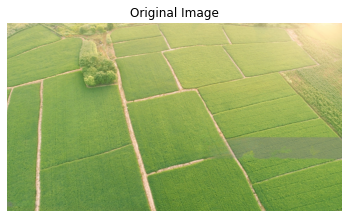

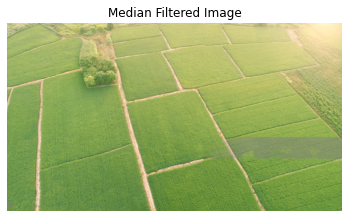

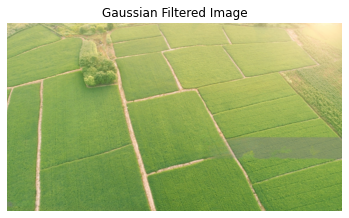

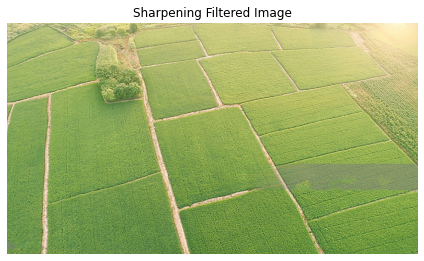

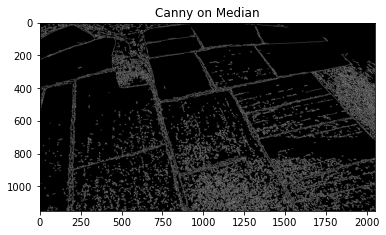

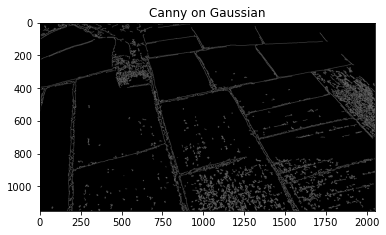

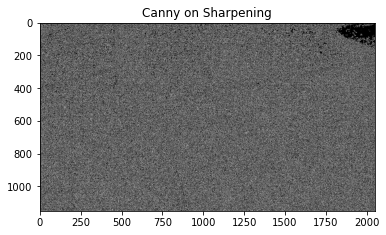

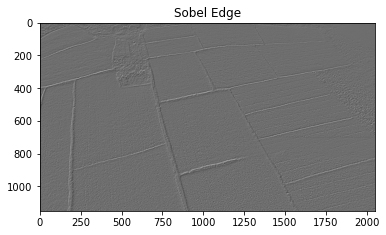

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


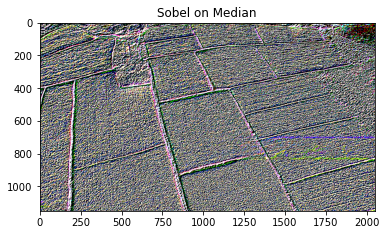

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


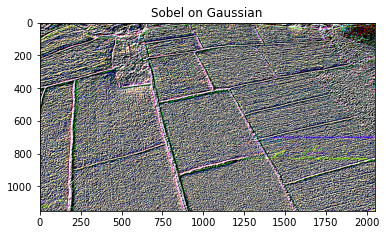

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


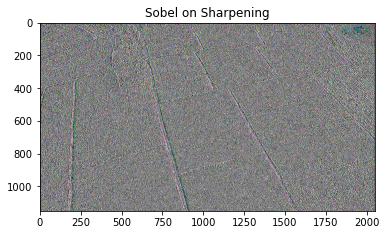

In [5]:
# Filters & Edge Detection

# Showing Original Image
img4 = cv2.imread("./AerialView.jpeg",cv2.IMREAD_COLOR)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.title('Original Image')
plt.imshow(img4_rgb)
plt.axis('off')
plt.show()
##########################################################################

# Applying Median, Gaussian, and Sharpening Filters
# Median Filter
# ksize is the size of the kernel; it must be an odd number
ksize = 3  # kernel size
median_filtered_image = cv2.medianBlur(img4, ksize)

# Convert the filtered image to RGB for displaying with matplotlib
median_filtered_image_rgb = cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB)
plt.title('Median Filtered Image')
plt.imshow(median_filtered_image_rgb)
plt.axis('off')
plt.show()

# Gaussian Filter
gaussian_filtered_image = cv2.GaussianBlur(img4, (5,5),0)
gaussian_filtered_image_rgb = cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB)
plt.title('Gaussian Filtered Image')
plt.imshow(gaussian_filtered_image_rgb)
plt.axis('off')
plt.show()

# Sharpening Filter
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(img4,-1,kernel_sharpening)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
plt.title('Sharpening Filtered Image')
plt.imshow(sharpened_rgb)
plt.axis('off')
plt.tight_layout()
plt.show()
##########################################################################
# Canny & Sobel
# Canny on Median
canny1 = cv2.Canny(median_filtered_image_rgb,50,120)
plt.title('Canny on Median')
plt.imshow(cv2.cvtColor(canny1, cv2.COLOR_BGR2RGB))
plt.show()
# Canny on Gaussian
canny2 = cv2.Canny(gaussian_filtered_image_rgb,50,120)
plt.title('Canny on Gaussian')
plt.imshow(cv2.cvtColor(canny2, cv2.COLOR_BGR2RGB))
plt.show()
# Canny on Sharpening
canny3 = cv2.Canny(sharpened_rgb,50,120)
plt.title('Canny on Sharpening')
plt.imshow(cv2.cvtColor(canny3, cv2.COLOR_BGR2RGB))
plt.show()
###########################################################################
#Sobel
# Convert the image to grayscale
gray_image = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # X direction
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Y direction

sobel_edge1 = sobel_x + sobel_y
plt.title('Sobel Edge')
plt.imshow(sobel_edge1, cmap='gray')
plt.show()

# Sobel on Median
sobel_x_med = cv2.Sobel(median_filtered_image_rgb, cv2.CV_64F, 1, 0, ksize=3)  # X direction
sobel_y_med = cv2.Sobel(median_filtered_image_rgb, cv2.CV_64F, 0, 1, ksize=3)  # Y direction
sobel_edge2 = sobel_x_med + sobel_y_med
plt.title('Sobel on Median')
plt.imshow(sobel_edge2, cmap='gray')
plt.show()
# Sobel on Gaussian
sobel_x_gaus = cv2.Sobel(gaussian_filtered_image_rgb, cv2.CV_64F, 1, 0, ksize=3)  # X direction
sobel_y_gaus = cv2.Sobel(gaussian_filtered_image_rgb, cv2.CV_64F, 0, 1, ksize=3)  # Y direction
sobel_edge3 = sobel_x_gaus + sobel_y_gaus
plt.title('Sobel on Gaussian')
plt.imshow(sobel_edge3, cmap='gray')
plt.show()
# Sobel on Sharpening
sobel_x_shar = cv2.Sobel(sharpened_rgb, cv2.CV_64F, 1, 0, ksize=3)  # X direction
sobel_y_shar = cv2.Sobel(sharpened_rgb, cv2.CV_64F, 1, 0, ksize=3)  # Y direction     
sobel_edge4 = sobel_x_shar + sobel_y_shar
plt.title('Sobel on Sharpening')
plt.imshow(sobel_edge4, cmap='gray')
plt.show()  


<p dir = "rtl">
    ابتدا عکس اصلی را نشان داده ایم. بعد از آن سه فیلتر Median، Gaussian و Sharpening را بر روی عکس اعمال کرده ایم و آن ها را نمایش داده ایم.
    همه فیلتر ها با کرنل مربعی 3 در 3 اعمال می شوند.
    فیلتر sharpening از آنجایی که عکس را شارپ تر کرده می تواند برای استفاده در الگوریتم های edge detection بهتر باشد چون با شارپ کردن گوشه های زمین ها خیلی بهتر معلوم است و می توان بهترین خروجی را گرفت.
    </p>
    <p dir = "rtl">
   اما وقتی کار به edge detection می رسد می بینیم که در حالت sharpening اوضاع به خاطر زیادی شارپ شدن خراب است و عملا نتایج خوبی نداریم چه با canny و چه با sobel.
</p>
<p dir = "rtl">
    اما می بینیم با فیلتر های gaussian و median خیلی بهتر عمل edge detection داریم.
    طبق چیزی که مشاهده می کنیم فیلتر gaussian از همه بهتر بوده و در نهایت با مقایسه دو حالت لبه یابی canny و sobel. sobel خیلی عملکرد بهتری دارد.
    </p>
    <p dir = "rtl">
     در نتیجه بهترین ترکیب فیلتر gaussian و الگوریتم لبه یاب soble است.
    </p>